# Datasets
Author: Javier Duarte


## Load datasets from `ROOT` files using `uproot`
Here we load the `ROOT` datasets in python using `uproot`

In [1]:
import uproot

## Load `ROOT` files
Here we load the `ROOT` datasets with `uproot` (see: https://github.com/scikit-hep/uproot)

In [2]:
import numpy as np
import numpy as np
import pandas as pd

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}

filename['bkg'] = 'data/ntuple_4mu_bkg.root'
filename['VV'] = 'data/ntuple_4mu_VV.root'

upfile['bkg'] = uproot.open(filename['bkg'])
upfile['VV'] = uproot.open(filename['VV'])

#print(upfile['bkg'][treename].show())

## Convert tree to `pandas` DataFrames
In my opinion, `pandas` DataFrames are a more convenient/flexible data container in python: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html. 

In [3]:
import pandas as pd

VARS = ['f_mass4l','f_massjj'] # choose which vars to use (2d)

#upfile['VV'] = uproot.open(filename['VV'])
#upfile['bkg'] = uproot.open(filename['bkg'])

df = {}
#df['bkg'] = upfile['bkg'][treename].pandas.df()
#df['VV'] = upfile['VV'][treename].pandas.df()

df['bkg'] = upfile['bkg'][treename].pandas.df(branches=VARS)
df['VV'] = upfile['VV'][treename].pandas.df(branches=VARS)

# print first entry
# print(df['bkg'].iloc[:1])

# print shape of DataFrame
# print(df['bkg'].shape)

# print first entry for f_mass4l and f_massjj
# print(df['bkg'][['f_mass4l','f_massjj']].iloc[:1])

# convert back into unstructured NumPY array
# print(df['bkg'].values)
# print(df['bkg'].values.shape)

# get boolean mask array
# mask = (df['bkg']['f_mass4l'] > 125)
# print(mask)

# cut using this boolean mask array
# print(df['bkg']['f_mass4l'][mask])

(0, 2000)

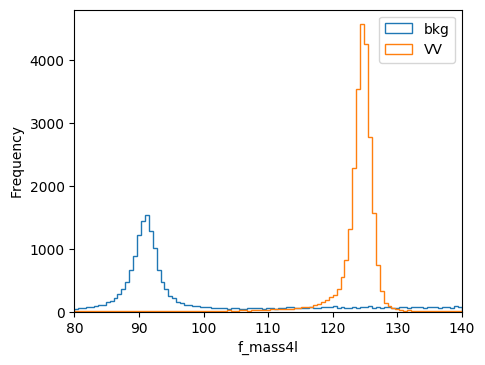

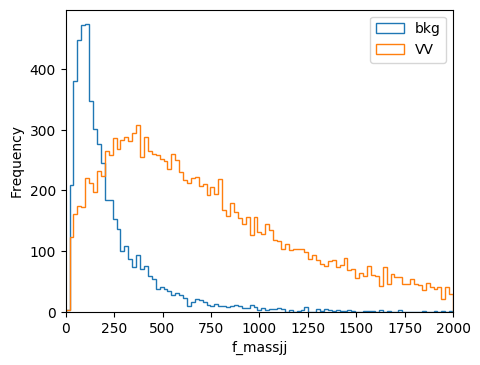

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins=bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins=bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)